In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
problematic_arms = pd.read_csv('problematic_6dof.csv', header=None)
problematic_arms.columns = ["Arm_ID"]

problematic_arms

,Arm_ID
0,_roll_z_0_1_roll_y_0_1_pitch_y_0_1_pitch_x_0_1...
1,_roll_z_0_1_pitch_y_0_1_pris_x_0_1_pris_x_0_7_...
2,_roll_z_0_1_roll_y_0_1_pris_z_0_1_pris_y_0_5_p...
3,_roll_z_0_1_roll_y_0_7_pris_y_0_3_pitch_z_0_3_...
4,_roll_z_0_1_pris_y_0_7_roll_y_0_3_pitch_y_0_1_...
...,...
703,_roll_z_0_1_pris_y_0_5_roll_y_0_3_pitch_y_0_1_...
704,_roll_z_0_1_pris_y_0_5_roll_y_0_5_pitch_y_0_1_...
705,_roll_z_0_1_pris_y_0_1_roll_z_0_1_pris_y_0_1_p...
706,_roll_z_0_1_roll_y_0_1_pris_y_0_3_pris_x_0_1_r...


In [29]:
''' split arm name to features '''
# new data frame with split value columns
new = problematic_arms["Arm_ID"].str.split("_", expand=True)

problematic_arms["Joint1 type"] = new[1]
problematic_arms["Joint1 axis"] = new[2]
problematic_arms["Link1 length"] = new[3] + "." + new[4]

problematic_arms["Joint2 type"] = new[5]
problematic_arms["Joint2 axis"] = new[6]
problematic_arms["Link2 length"] = new[7] + "." + new[8]

problematic_arms["Joint3 type"] = new[9]
problematic_arms["Joint3 axis"] = new[10]
problematic_arms["Link3 length"] = new[11] + "." + new[12]

problematic_arms["Joint4 type"] = new[13]
problematic_arms["Joint4 axis"] = new[14]
problematic_arms["Link4 length"] = new[15] + "." + new[16]

problematic_arms["Joint5 type"] = new[17]
problematic_arms["Joint5 axis"] = new[18]
problematic_arms["Link5 length"] = new[19] + "." + new[20]

problematic_arms["Joint6 type"] = new[21]
problematic_arms["Joint6 axis"] = new[22]
problematic_arms["Link6 length"] = new[23] + "." + new[24]

problematic_arms = problematic_arms.drop(['Arm_ID'], axis=1)

pd.set_option('display.max_rows',800)
problematic_arms

,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length,Joint5 type,Joint5 axis,Link5 length,Joint6 type,Joint6 axis,Link6 length
0,roll,z,0.1,roll,y,0.1,pitch,y,0.1,pitch,x,0.1,roll,z,0.5,pitch,y,0.7
1,roll,z,0.1,pitch,y,0.1,pris,x,0.1,pris,x,0.7,pitch,x,0.3,roll,x,0.7
2,roll,z,0.1,roll,y,0.1,pris,z,0.1,pris,y,0.5,pitch,x,0.3,roll,z,0.7
3,roll,z,0.1,roll,y,0.7,pris,y,0.3,pitch,z,0.3,pitch,x,0.1,roll,y,0.5
4,roll,z,0.1,pris,y,0.7,roll,y,0.3,pitch,y,0.1,roll,x,0.1,pitch,y,0.5
5,roll,z,0.1,roll,y,0.1,pris,y,0.5,roll,y,0.1,pris,z,0.3,pitch,y,0.7
6,roll,z,0.1,pris,y,0.3,roll,y,0.1,pitch,y,0.3,pitch,x,0.1,roll,x,0.7
7,roll,z,0.1,pris,y,0.1,roll,y,0.5,pris,y,0.1,pris,x,0.3,roll,x,0.7
8,roll,z,0.1,roll,y,0.1,pris,y,0.1,roll,z,0.7,pitch,y,0.3,roll,z,0.5
9,roll,z,0.1,roll,y,0.1,pitch,y,0.1,pitch,x,0.5,roll,y,0.1,roll,y,0.7


In [30]:
'''Group by Joints Configurations
    Mean_Min_Manipulability - avarage of minimum manipulability
    MaxSum_Mid_joint_proximity - avarage of maximum sum of mid joint matrix
'''

joint_conf_problematic = problematic_arms.groupby(['Joint1 type','Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis','Joint5 type', 'Joint5 axis','Joint6 type', 'Joint6 axis']).agg('min')

# joint_conf_problematic = joint_conf_problematic.drop(columns=['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length','Link5 length','Link6 length'])
#joint_conf_problematic = joint_conf_problematic.aggregate(np.sum)

pd.set_option('display.max_rows', 500)
joint_conf_problematic


Link1 length  \
Joint1 type Joint1 axis Joint2 type Joint2 axis Joint3 type Joint3 axis Joint4 type Joint4 axis Joint5 type Joint5 axis Joint6 type Joint6 axis                
roll        z           pitch       y           pitch       x           pris        y           roll        y           pitch       y                    0.1   
                                                                                                                        pris        z                    0.1   
                                                                        roll        z           roll        y           roll        y                    0.1   
                                                            y           pris        y           roll        y           pitch       y                    0.1   
                                                            z           pitch       x           pitch       x           pitch       z                    0.1   
                                                                                                                        roll        y                    0.1   
                                                                                                roll        x           pitch       y                    0.1   
                                                                                                                        roll        y                    0.1   
                                                                                    z           pris        y           roll        y                    0.1   
                                                                        pris        y           roll        y           pitch       y                    0.1   
                                                pris        x           pitch       z           pris        x           roll        x                    0.1   
                                                                        pris        x           pitch       x           roll        x                    0.1   
                                                                                                            y           pitch       y                    0.1   
                                                                                                pris        x           roll        y                    0.1   
                                                                                                roll        z           pitch       y                    0.1   
                                                            y           pitch       x           pris        x           roll        z                    0.1   
                                                                                    y           roll        y           pitch       y                    0.1   
                                                                                                                        pris        z                    0.1   
                                                                                                            z           roll        y                    0.1   
                                                                        pris        x           roll        y           pris        z                    0.1   
                                                                        roll        x           roll        y           pitch       y                    0.1   
                                                                                    y           pitch       y           pitch       x                    0.1   
                                                                                                                                    y                    0.1   
                                                                                                                        roll        x           

In [35]:
'''Group by Joints Configurations
    Mean_Min_Manipulability - avarage of minimum manipulability
    MaxSum_Mid_joint_proximity - avarage of maximum sum of mid joint matrix
'''
links_conf_6dof = grouped_all_6dof_data.groupby(
    ['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length','Link5 length','Link6 length']).agg(
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

links_conf_6dof['Configuration Index'] = links_conf_6dof.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length','Link5 length','Link6 length']).ngroup()


links_conf_6dof

,Link1 length,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,Configuration Index
0,0.1,0.1,0.1,0.1,0.3,0.7,0.513211,0.616263,0
1,0.1,0.1,0.1,0.1,0.5,0.5,0.357706,2.093000,1
2,0.1,0.1,0.1,0.1,0.5,0.7,0.482067,1.004000,2
3,0.1,0.1,0.1,0.1,0.7,0.3,0.172618,2.727471,3
4,0.1,0.1,0.1,0.1,0.7,0.5,0.246296,2.565111,4
...,...,...,...,...,...,...,...,...,...
451,0.1,0.7,0.5,0.5,0.1,0.1,0.400036,0.463411,451
452,0.1,0.7,0.7,0.1,0.1,0.1,0.500077,0.449108,452
453,0.1,0.7,0.7,0.1,0.1,0.3,0.534822,0.661384,453
454,0.1,0.7,0.7,0.1,0.3,0.1,0.406018,0.516964,454


In [43]:
'''Find the best Manipulator configurations'''
grouped_data = all_6dof_data.groupby(['Arm_ID'])['Success'].sum().astype(float).reset_index()

grouped_data

,Arm_ID,Success
0,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_x_0_...,0.0
1,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_x_0_...,0.0
2,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_x_0_...,0.0
3,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_x_0_...,0.0
4,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_x_0_...,0.0
...,...,...
91084,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_y_0_3_p...,2.0
91085,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_1_p...,7.0
91086,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_z_0_3_p...,0.0
91087,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_1_p...,10.0


In [55]:
'''All sucssesful manipulators - Reached 10 Clusters'''
good_arms = grouped_data.loc[grouped_data['Success'] > 9].reset_index()
good_arms
good_arms_list = good_arms['Arm_ID'].values.tolist()
good_arms_data = all_6dof_data.query('Arm_ID in @good_arms_list')
good_arms_data = good_arms_data.groupby(['Arm_ID']).agg(
    Success_Rates=pd.NamedAgg(column="Success", aggfunc='mean'),
    Min_Manipulability=pd.NamedAgg(column='Manipulability - mu', aggfunc='min'),
    Max_Manipulability=pd.NamedAgg(column='Manipulability - mu', aggfunc='max'),
    Manipulability_Rates=pd.NamedAgg(column='Manipulability - mu', aggfunc='mean'),
    MaxSum_Mid_joint_proximity=pd.NamedAgg(column='Sum Mid joint proximity- all joints', aggfunc='max')).reset_index()

good_arms_data

,Arm_ID,Success_Rates,Min_Manipulability,Max_Manipulability,Manipulability_Rates,MaxSum_Mid_joint_proximity
0,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_y_0_...,True,0.224,1.149,0.6980,0.713
1,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_y_0_...,True,0.559,1.311,1.0459,0.313
2,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_y_0_...,True,0.004,0.646,0.2714,0.657
3,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pitch_y_0_...,True,0.012,0.635,0.3179,0.529
4,_roll_z_0_1_pitch_y_0_1_pitch_x_0_1_pris_x_0_7...,True,0.061,0.863,0.7140,0.506
...,...,...,...,...,...,...
3958,_roll_z_0_1_roll_y_0_7_roll_y_0_5_roll_y_0_1_p...,True,0.324,0.763,0.5766,0.416
3959,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_y_0_1_p...,True,0.712,1.104,0.9213,0.394
3960,_roll_z_0_1_roll_y_0_7_roll_y_0_7_pris_y_0_1_r...,True,0.263,1.533,0.5765,3.462
3961,_roll_z_0_1_roll_y_0_7_roll_y_0_7_roll_y_0_1_p...,True,0.121,0.907,0.3974,0.449


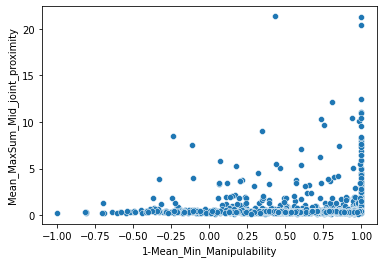

,Joint1 type,Joint1 axis,Joint2 type,Joint2 axis,Joint3 type,Joint3 axis,Joint4 type,Joint4 axis,Joint5 type,Joint5 axis,Joint6 type,Joint6 axis,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,roll,z,pitch,y,pitch,x,pitch,x,pitch,x,pitch,z,0.104000,0.434000,0.896000
1,roll,z,pitch,y,pitch,x,pitch,x,pitch,x,pris,y,0.142500,0.194500,0.857500
2,roll,z,pitch,y,pitch,x,pitch,x,pitch,y,pitch,x,0.141000,0.287000,0.859000
3,roll,z,pitch,y,pitch,x,pitch,x,pitch,y,pitch,y,0.059000,0.218000,0.941000
4,roll,z,pitch,y,pitch,x,pitch,x,pitch,y,pris,x,0.050500,0.332500,0.949500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,roll,z,roll,y,roll,y,roll,y,pris,z,pitch,y,0.551333,0.389333,0.448667
1787,roll,z,roll,y,roll,y,roll,y,pris,z,pris,y,0.324000,0.416000,0.676000
1788,roll,z,roll,y,roll,y,roll,y,pris,z,roll,y,0.133000,0.389000,0.867000
1789,roll,z,roll,y,roll,y,roll,y,roll,y,pris,y,0.112000,0.329000,0.888000


In [56]:
'''Sucssesful manipulators - Split to joints configuration'''
new = good_arms_data["Arm_ID"].str.split("_", expand=True)

good_arms_data["Joint1 type"] = new[1]
good_arms_data["Joint1 axis"] = new[2]
good_arms_data["Link1 length"] = new[3] + "." + new[4]

good_arms_data["Joint2 type"] = new[5]
good_arms_data["Joint2 axis"] = new[6]
good_arms_data["Link2 length"] = new[7] + "." + new[8]

good_arms_data["Joint3 type"] = new[9]
good_arms_data["Joint3 axis"] = new[10]
good_arms_data["Link3 length"] = new[11] + "." + new[12]

good_arms_data["Joint4 type"] = new[13]
good_arms_data["Joint4 axis"] = new[14]
good_arms_data["Link4 length"] = new[15] + "." + new[16]

good_arms_data["Joint5 type"] = new[17]
good_arms_data["Joint5 axis"] = new[18]
good_arms_data["Link5 length"] = new[19] + "." + new[20]

good_arms_data["Joint6 type"] = new[21]
good_arms_data["Joint6 axis"] = new[22]
good_arms_data["Link6 length"] = new[23] + "." + new[24]

good_arms_data = good_arms_data.drop(['Arm_ID'], axis=1)

joint_conf_best_manip = good_arms_data.groupby(['Joint1 type','Joint1 axis', 'Joint2 type', 'Joint2 axis',
                                                      'Joint3 type', 'Joint3 axis', 'Joint4 type',
                                                      'Joint4 axis','Joint5 type', 'Joint5 axis','Joint6 type', 'Joint6 axis']).agg(
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

joint_conf_best_manip['1-Mean_Min_Manipulability'] = 1 - joint_conf_best_manip['Mean_Min_Manipulability']
x = joint_conf_best_manip['1-Mean_Min_Manipulability']
y = joint_conf_best_manip['Mean_MaxSum_Mid_joint_proximity']

sns.scatterplot(x=x, y=y)
plt.show()

joint_conf_best_manip

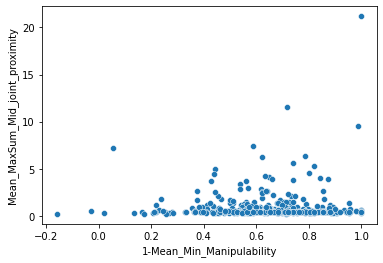

,Link1 length,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,Mean_Min_Manipulability,Mean_MaxSum_Mid_joint_proximity,1-Mean_Min_Manipulability
0,0.1,0.1,0.1,0.1,0.5,0.7,0.192000,0.353000,0.808000
1,0.1,0.1,0.1,0.1,0.7,0.3,0.059000,0.394000,0.941000
2,0.1,0.1,0.1,0.1,0.7,0.7,0.224000,0.713000,0.776000
3,0.1,0.1,0.1,0.3,0.5,0.3,0.210667,1.273333,0.789333
4,0.1,0.1,0.1,0.3,0.5,0.5,0.834000,0.474000,0.166000
...,...,...,...,...,...,...,...,...,...
415,0.1,0.7,0.5,0.5,0.1,0.1,0.508895,0.534053,0.491105
416,0.1,0.7,0.7,0.1,0.1,0.1,0.348706,0.453882,0.651294
417,0.1,0.7,0.7,0.1,0.1,0.3,0.365000,0.961364,0.635000
418,0.1,0.7,0.7,0.1,0.3,0.1,0.429500,0.947500,0.570500


In [59]:
'''Sucssesful manipulators - Split to links configuration'''
link_conf_best_manip = good_arms_data.groupby(['Link1 length', 'Link2 length', 'Link3 length', 'Link4 length','Link5 length','Link6 length']).agg(
    Mean_Min_Manipulability=pd.NamedAgg(column='Min_Manipulability', aggfunc='mean'),
    Mean_MaxSum_Mid_joint_proximity=pd.NamedAgg(column='MaxSum_Mid_joint_proximity', aggfunc='mean')).reset_index()

link_conf_best_manip['1-Mean_Min_Manipulability'] = 1 - joint_conf_best_manip['Mean_Min_Manipulability']
x = link_conf_best_manip['1-Mean_Min_Manipulability']
y = link_conf_best_manip['Mean_MaxSum_Mid_joint_proximity']

sns.scatterplot(x=x, y=y)
plt.show()

link_conf_best_manip